# Introducción a Python para ciencias e ingenierías (notebook 5)

Ing. Martín Gaitán

Email: `gaitan@gmail.com`

**Links útiles**

Repositorio del curso:

### http://bit.ly/cursopy

Python "temporal" online:

### http://try.jupyter.org

- Descarga de [Python "Anaconda"](http://continuum.io/downloads#py34)
- Resumen de [sintaxis markdown](https://github.com/jupyter/strata-sv-2015-tutorial/blob/master/resources/Working%20With%20Markdown%20Cells.ipynb)

## Una yapa de Numpy: Vectorizar funciones 



Sabemos que Numpy opera vectorialmente, es decir, ejecutando la operación aritmetica o la "función universal" (ufunc)
a cada uno de los elementos de los operadores.

In [1]:
import numpy as np
x = np.array([1, 2., 3.])
y = np.array([.3, -5, 10])

También sabemos que cuando operamos un vector con un escalar se aplica el broadcasting

In [2]:
x >= 2

array([False,  True,  True], dtype=bool)

pero no podemos hacer un "casting" automático de un array tipo booleano a un sólo booleano

In [3]:
bool(x >= 2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Ese "cast" se puede hacer con funciones de agregación booleanas, como `all`, `allclose`, `any`, etc. pero muchas veces eso implica cambiar código que ya tenemos escrito

In [4]:
np.all(x >= 2)

False

Por ejemlo, veamos este par de funciones

In [5]:
def func1(a):
    return a ** 2


def func2(a):
    """Return the same value if it's negative, otherwise returns its square"""
    
    if a < 0:
        return a
    else:
        return a**2

obviamente ambas funcionan con escalares,

In [6]:
func1(10), func2(-4)

(100, -4)

Y `func1` funciona también para arrays, debido a que la operación que hace (potencia) admite broadcasting.

In [7]:
func1(np.arange(10))

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Sin embargo, como el casting de un array de booleanos a un sólo booleano no es automático, `func2` no es "universal"

In [8]:
func2(np.arange(10))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Lo que necesitamos es **vectorizar la función**. `vectorize` transforma una función cualquiera en una de tipo universal: esto es, cuando un parámetro es un array y la aplicación directa no funciona, automáticamente se realiza una iteración implicita elemento a elemento.

In [ ]:
v_func2 = np.vectorize(func2)
v_func2(np.arange(10))    # para cada elemento de x, aplica func2

In [ ]:
type(v_func2), v_func2.__doc__

Y sigue funcionando para escalares

In [ ]:
v_func2(2)

### Ejercicio

1. Defina como función universal de numpy la siguiente función definida por partes y grafique entre -5 y -5

$$
  y = f(x) =
   \left \{
   \begin{array}{rcl}
      x + 3, & \mbox{si } & x < -1 \\
      x^2+1, & \mbox{si } & -1 \le x \le 2 \\
      5, & \mbox{si } &  x > 2
   \end{array}
   \right .
$$

<!--

import numpy as np
from matplotlib import pyplot as plt

def _f(x):
    if x < -1:
        return x + 3
    elif -1 <= x <= 2:
        return x**2 + 1
    else:
        return 5
f = np.vectorize(_f)


%matplotlib inline

ax = plt.subplot(1,1,1)

x = np.linspace(-5,5,100)
ax.plot(x,f(x))
ax.set_ylim(top=6);
-->


## Scipy: parado sobre hombros de gigantes

La biblioteca Scipy se basa en los arrays multidimensionales de Numpy e implementa cientos de algoritmos científicos de alto nivel, clasificados en subpaquetes temáticos.


* Integración y ecuaciones diferenciales ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal (mejor que `numpy.linalg`) ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Algoritmos optimizados para matrices ralas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/salida de archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))
* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))

y hay más! Toda la documentación en http://docs.scipy.org/doc/scipy/reference/

Veamos algunas aplicaciones


## Integrales

La evaluación numérica de integrales de la forma

$\displaystyle \int_a^b f(x) dx$

se llaman *cuadratura numérica*, o simplemente *cuadratura*. SciPy tiene las funciones  `quad`, `dblquad` y `tplquad` para cuadraturas simples, dobles o triples.

In [ ]:
quad

In [1]:
from scipy.integrate import quad

# definimos f f(x)
def f(x):
    return 2*x

In [ ]:
val, abserr = quad(f, 0, 3)
print("integral value =", val, ", absolute error =", abserr)

Ya que estamos definiendo "funciones objetivo", hay otra manera de definir funciones simples en python, que sólo si queremos las asignamos a un nombre. 
Por ejemplo 

```python
def f(x): 
    return x+2
```

se podría definir así

In [ ]:
# otro ejemplo de funcion lambda
f = lambda x: x+2     #  -> def f(x): return x**2

In [ ]:
f(2)

Lo útil es que esta forma de crear **funciones anónimas** permite definirlas directamente al pasarla como argumento

In [ ]:
quad(lambda x: x**2, 0, 3)

#### Integración de funciones con parámetros adicionales


Si necesitaramos pasarle parámetros a nuestra función lo hacemos en un tupla en el argumento `args`. Por ejemplo, supongamos que tenemos una función de la forma $g(x) = x^n$ donde `x` es la variable independiente y `n` es un parámetro.

In [ ]:
def g(x, n):
    return x**n

Si quisieramos evaluar la integral de esta función de x fijando n en 3

In [ ]:
# evalua la integral x**3
quad(g, 0, 5, args=(3,))

In [ ]:
from scipy import integrate

In [ ]:
integrate.dblquad

### Ecuaciones diferenciales ordinarias

El paquete de integración también tiene funciones para resolver [ecuaciones diferenciales ordinarias](https://en.wikipedia.org/wiki/Ordinary_differential_equation).

Por ejemplo, para resolver 

$$\frac{\mathrm{d}y}{\mathrm{d}t} = -2y$$

 con $t  \in [-1, 5]$  y la condición inicial $y(0) = 1$ 

In [ ]:
%matplotlib inline 

from matplotlib import pyplot as plt
import numpy as np

from scipy.integrate import odeint

t = np.linspace(-1, 5, 100)
y = odeint(lambda y,t: -2*y, 1, t)
plt.plot(t,y)

Como vemos, [el resultado es correcto](http://www.wolframalpha.com/input/?i=y%27+%3D+-2y)

### Ejercicios

1. Dado el ejemplo de [gráfico "fill"](http://matplotlib.org/examples/lines_bars_and_markers/fill_demo.html) calcular el área de toda la superficie sombreada en rojo

<!-- solucion

https://gist.githubusercontent.com/mgaitan/36d4dbce14ab4dc69f52/raw/9d040d916ebb77bf7ff2618a59e9b6ad95db71e8/area.py
-->

In [ ]:

# otra manera: directamente aplicar el método de trapezoides (teniendo datos y no la funcion)
np.trapz(np.abs(y), x)

## Optimización y ajuste de curvas

### encontrar mínimos

Supongamos que tenemos una función cualquiera de una o más variables


In [ ]:
def fpol(x):
    return x**4 + 5*x**3 + (x-2)**2

In [ ]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 2, 100)
ax.plot(x, fpol(x));

Podemos encontrar un mínimo local con la función `minimize`, que recibe como parámetro la función objetivo y un *valor de estimación inicial* a partir del cual se comienza a "ajustar"

In [ ]:
from scipy import optimize
result = optimize.minimize(fpol, -3, method='BFGS') # http://en.wikipedia.org/wiki/BFGS
result

In [ ]:
result['x']

`minimize` es una "función paraguas" para diferentes algoritmos, que se pueden elegir mediante el parámetro `method` o bien utilizar la función explícita de minimización que lo implementa.


In [ ]:
optimize.minimize(fpol, 0, method='hBFGS')['x']

Ojo que hay métodos que son muy sensibles al valor de estimación

In [ ]:
optimize.minimize(fpol, 0, method='Powell')['x']

#### Ejercicio 

1. Encuentre el mínimo y el máximo de la función 

$$f(x,y) = xe^{-x^2 - y^2}$$

2- Basado en los ejemplos de gráficos de [superficie](http://matplotlib.org/examples/mplot3d/surface3d_demo.html), y [scatter 3d](http://matplotlib.org/examples/mplot3d/scatter3d_demo.html) grafique la superficie para $x, y \in [(-2, 2),(-2,2)]$ con un punto triangular en los puntos encontrados anteriormente

<!-- 
https://gist.githubusercontent.com/mgaitan/faa930a5874311a6f888/raw/ec7ff8268935ab53095c3067c12210d26c40b406/min_and_max.py

-->

In [ ]:
# %load https://gist.githubusercontent.com/mgaitan/faa930a5874311a6f888/raw/ec7ff8268935ab53095c3067c12210d26c40b406/min_and_max.py
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x = y = np.linspace(2, -2, 100)
xx,yy = np.meshgrid(x, y)

f = lambda var: var[0]*np.exp(-var[1]**2 - var[0]**2)

z = f([xx,yy])

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.gca(projection='3d')
ax.plot_surface(xx,yy,z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0)


In [ ]:

# ----
from scipy import optimize
minimum = optimize.minimize(f, [-1, 1])
maximum = optimize.minimize(lambda x: -f(x), [1, 1])
minimum, maximum


In [ ]:

# ----

ax.scatter(minimum['x'][0], minimum['x'][1], minimum['fun'], marker='v', s=200)
ax.scatter(maximum['x'][0], maximum['x'][1], f(maximum['x']), marker='^', s=200)
fig


### Curve fitting


Otra tarea frecuente es ajustar parámetros de una función objetivo a partir de un *dataset* de puntos conocidos. 

Supongamos que tenemos una serie de datos medidos



In [ ]:
dataset = np.array([[ 0.        ,  3.07127661],
                   [ 0.08163265,  2.55730445],
                   [ 0.16326531,  2.28438915],
                   [ 0.24489796,  1.91475822],
                   [ 0.32653061,  2.00380351],
                   [ 0.40816327,  1.89419135],
                   [ 0.48979592,  1.74713349],
                   [ 0.57142857,  1.68237822],
                   [ 0.65306122,  1.44749977],
                   [ 0.73469388,  1.67511522],
                   [ 0.81632653,  1.34023054],
                   [ 0.89795918,  1.1209472 ],
                   [ 0.97959184,  1.41692478],
                   [ 1.06122449,  0.88480583],
                   [ 1.14285714,  0.9939094 ],
                   [ 1.2244898 ,  1.02293629],
                   [ 1.30612245,  1.11983417],
                   [ 1.3877551 ,  0.77520734],
                   [ 1.46938776,  0.88371884],
                   [ 1.55102041,  1.24492445],
                   [ 1.63265306,  0.8275613 ],
                   [ 1.71428571,  0.60846983],
                   [ 1.79591837,  0.73019407],
                   [ 1.87755102,  0.75139707],
                   [ 1.95918367,  0.6496137 ],
                   [ 2.04081633,  0.59122461],
                   [ 2.12244898,  0.61734269],
                   [ 2.20408163,  0.61890166],
                   [ 2.28571429,  0.68647436],
                   [ 2.36734694,  0.47551378],
                   [ 2.44897959,  0.89850013],
                   [ 2.53061224,  0.53029377],
                   [ 2.6122449 ,  0.74853936],
                   [ 2.69387755,  0.371923  ],
                   [ 2.7755102 ,  0.43536233],
                   [ 2.85714286,  0.40515777],
                   [ 2.93877551,  0.52171142],
                   [ 3.02040816,  0.53069869],
                   [ 3.10204082,  0.71363042],
                   [ 3.18367347,  0.54962316],
                   [ 3.26530612,  0.7133841 ],
                   [ 3.34693878,  0.27204244],
                   [ 3.42857143,  0.56572211],
                   [ 3.51020408,  0.29310287],
                   [ 3.59183673,  0.50044492],
                   [ 3.67346939,  0.60938301],
                   [ 3.75510204,  0.55696286],
                   [ 3.83673469,  0.59409416],
                   [ 3.91836735,  0.30335525],
                   [ 4.        ,  0.24230362]]
                  )

In [ ]:
x, y =  dataset[:,0], dataset[:,1]

fig  = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(dataset[:,0], dataset[:,1], marker='^');

Vemos que tiene forma de exponencial decreciente, es decir

$$
    f(x) = ae^{-bx} + c
$$

El objetivo es encontrar cuales son los valores de los parámetros `a`, `b` y `c` que mejor ajustan la curva a los puntos dados. 


In [ ]:
def func(x, a, b, c):   # x es la variable independiente, a b y c los parametros a encontrar
    return a*np.exp(-b*x) + c


popt, pcov = optimize.curve_fit(func, x, y)
popt

Por lo tanto la curva que mejor ajusta a nuestros datos es

$$f(x) = 2.33e^{-1.18x} + 0.25$$

In [ ]:
ax.plot(x, func(x, *popt), 'r', label='fitted')
fig

### Procesamiento de imágenes

Una imágen digital tipo [raster](https://en.wikipedia.org/wiki/Raster_graphics) (matriz de pixeles) puede ser facilmente interpretable como un array multidimensional. Por ejemplo, una imágen de 512x512 pixeles a color puede alamcenarse en una "matriz" de 3x512x512 donde cada una las 3 matrices representa una capa de colo RGB (rojo, verde, azul)

Para una imágen monocromática, obviamente una sóla matriz nos alcanza. 

Scipy trae el array de una [imágen clásica](https://en.wikipedia.org/wiki/Lenna) (fragmento de una foto de PlayBoy de 1972) para ejemplos de procesamiento de imágenes, en escala de grises. 


In [ ]:
from scipy.misc import lena
image =  lena()
image.shape,

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.gray()
plt.imshow(image)

Podemos procesar imágenes simplemente aplicando máscaras 



In [ ]:
mascara = (image > image.max() * .75)
plt.imshow(mascara)   # blanco == True

Podemos aplicar la máscara a la imágen original, por ejemplo, 

In [ ]:
plt.imshow(np.where(mascara, image, 255))

In [ ]:
mask = np.tril(np.ones(image.shape))  #tril / triu seleccionan triangulos inf y sup
plt.imshow(np.where(mask, image, 255))

Scipy trae un paquete para manipulación de **imágenes multidimensionales** 

In [ ]:
from scipy import ndimage

In [ ]:
plt.imshow(ndimage.convolve(image, np.ones((12,12))))

### Transformaciones

In [ ]:
lena = image
shifted_lena = ndimage.shift(lena, (50, 50))
shifted_lena2 = ndimage.shift(lena, (50, 50), mode='nearest')
rotated_lena = ndimage.rotate(lena, 30)
cropped_lena = lena[50:-50, 50:-50]
zoomed_lena = ndimage.zoom(lena, 5)
imgs = (shifted_lena, shifted_lena2, rotated_lena, cropped_lena, zoomed_lena)
fig, axes = plt.subplots(1, 5, figsize=(20,100))
for ax, img in zip(axes, imgs):
    ax.tick_params(left=False, bottom=False, labelleft=False)
    ax.imshow(img)

### Filtros

In [ ]:
from scipy import signal

noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
median_lena = ndimage.median_filter(blurred_lena, size=5)
wiener_lena = signal.wiener(blurred_lena, (5,5))
imgs = (noisy_lena, blurred_lena, median_lena, wiener_lena)
fig, axes = plt.subplots(1, 4, figsize=(20,80))
for ax, img in zip(axes, imgs):
    ax.tick_params(left=False, bottom=False, labelleft=False)
    ax.imshow(img)

Si les interesa esta área deberian ver los paquetes especializados [Scikit-image](http://scikit-image.org/), [Pillow](http://pillow.readthedocs.org) y [OpenCV](http://opencv.org/)

## Transformada de Fourier

    


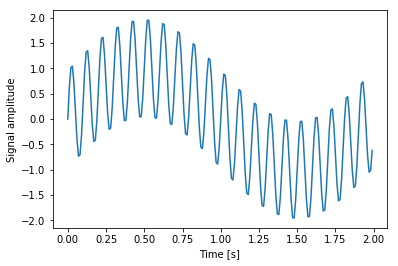

In [65]:
%matplotlib inline

f = 10     # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t) + np.sin(np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

(-5, 110)

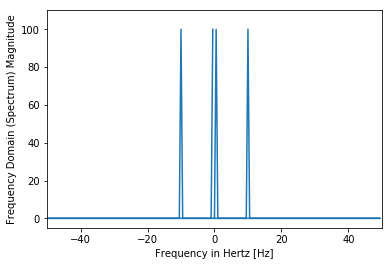

In [67]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

# A now, something completely different: SymPy!

([intertextualidad :D](https://en.wikipedia.org/wiki/And_Now_for_Something_Completely_Different)) De paso, sabías que el Python se llama así porque el holandés que lo creo es fanático de Monty Python)

SymPy es una biblioteca Python para matemática simbólica, similar a software como Mathematica o Mathcad. La documentación se encuentra en http://sympy.org/ .

En Anaconda (full) ya viene instalado, o se puede instalar via pip o conda con

      $ pip install sympy   

### ¿que es la computación simbólica?

Comunmente, las computadoras usan una [coma flotante](http://en.wikipedia.org/wiki/Floating_point) para **representar** numeros reales (y complejos) y calcular operaciones matemáticas. Esto implica que la precisión es limitada

In [11]:
import math
math.sqrt(8)

2.8284271247461903

Los sistemas de cálculo simbólico (o álgebra computacional, CAS), utilizan una **representación simbólica** (presentada de la manera más simplicifada posible)

In [12]:
import sympy

raiz8 = sympy.sqrt(8)
raiz8

2*sqrt(2)

Podemos, por supuesto, **evaluar** la expresión simbólica

In [13]:
raiz8.evalf()

2.82842712474619

In [14]:
raiz8.evalf(n=150)

2.82842712474619009760337744841939615713934375075389614635335947598146495692421407770077506865528314547002769246182459404984967211170147442528824299420

Por defecto la evaluación numérica se lleva a cabo con un precisión de 15 decimales.
Pero puede ajustarse la precisión al número de decimales que uno desee, enviando el número de decimales como argumento a evalf() o a la función `N()`

SymPy utiliza como background la biblioteca [mpmath](http://code.google.com/p/mpmath/) que le permite realizar cálculos con aritmética de **precisión arbitraria**, de forma tal que ciertas constantes especiales, como pi, el número e, oo (infinito), son tratadas como símbolos y pueden ser evaluadas con aritmética de alta precisión:

### Salida enriquecida

Para continuar, haremos que el "output matemático" se vea más bonito

In [15]:
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

Esa función inicializa el output en le mejor modo disponible en el entorno. Como los notebooks saben mostrar LaTex, lo hará así, mostrando *outputs* muy bonitos.

In [16]:
sympy.sqrt(8)

2⋅√2

### SymPy como una calculadora

SymPy tiene tres tipos de datos predefinidos: el real (Real), el racional (Rational) y el entero (Integer).
El tipo `Rational` representa a un número racional como un par de números enteros: el numerador y el denominador.
Por ejemplo: `Rational(1, 2)` representa la fracción $1/2$, `Rational(5, 3)` a $5/3$, etc.

In [17]:
a = sympy.Rational(1, 2)
a

1/2

In [18]:
a*2

1

In [19]:
sympy.pi**2

 2
π 

In [20]:
sympy.pi.evalf(n=200)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862
089986280348253421170679821480865132823066470938446095505822317253594081284811
174502841027019385211055596446229489549303820

In [21]:
(sympy.pi+sympy.exp(1)).evalf()

5.85987448204884

También existe una clase para representar al infinito matemático, llamada oo:

In [22]:
sympy.oo > 99999

True

In [23]:
sympy.oo + 1

∞

In [24]:
1 / sympy.oo

0

otra manera de ejecutar `evalf` de una expresión es con la función `sympy.N`

In [25]:
sympy.N(sympy.sqrt(2), 100)

1.4142135623730950488016887242096980785696718753769480731766797379907324784621
07038850387534327641573

#### Ejercicios:

1. Calcular 1/2 + 1/3 con aritmética racional.
2. Calcular $2^e$ con 200 decimales

### Símbolos

El alma del Cálculo Simbólico son, naturalmente, las variables simbólicas, que en SymPy son instancias de la clase `Symbol`. Una explicación intuitiva es que, mientras que las variables ordinarias tienen un valor que puede ser un número, una cadena, un valor verdadero / falso, una secuencia, etc. las variables simbólicas juegan el papel de "contenedores": no sabemos a priori lo que pueden ser

In [26]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
n = sympy.Symbol('n', integer=True)

Luego, pueden ser manipuladas:

In [27]:
x + y + x - y

2⋅x

In [28]:
(x + y)**2

       2
(x + y) 

Una manera más compacta de definir variables simbólicas es con la función `symbols`, que permite pasar una cadena con muchas variables a generar separadas por espacios.

In [29]:
a, b = sympy.symbols('a b')
(a - b)**2

       2
(a - b) 

### Traducir expresiones a otros lenguajes

Podemos aprovechar toda la funcionalidad de "impresión" que trae Sympy para traducir cualquier expresión a otros formatos. 

In [30]:
from sympy import sin, exp, cos

formula = sin(x)*exp(cos(x)**x)/x
print(sympy.latex(formula, mode='equation', itex=True))

$$\frac{1}{x} e^{\cos^{x}{\left (x \right )}} \sin{\left (x \right )}$$


Sólo nos queda copiar y pegar esa expresión en markdown

$$\frac{1}{x} e^{\cos^{x}{\left (x \right )}} \sin{\left (x \right )}$$


In [31]:
sympy.ccode(formula)   # codigo C ansi

'exp(pow(cos(x), x))*sin(x)/x'

In [32]:
sympy.fcode(formula)   # codigo fortran iso

'      exp(cos(x)**x)*sin(x)/x'

### Manipulación algebráica

SymPy tiene una gran potencia para realizar cálculos en forma algebráica.

In [33]:
sympy.expand((x+y)**2, deep=True)

 2            2
x  + 2⋅x⋅y + y 

también se pueden hacer especificaciones adicionales:

In [34]:
sympy.expand(x + y, complex= True)

re(x) + re(y) + ⅈ⋅im(x) + ⅈ⋅im(y)

A veces es útil darle "pistas" al sistema para que sepa por qué "camino matemático" andar

In [35]:
sympy.expand(sympy.cos(x + y))

cos(x + y)

In [36]:
sympy.expand(sympy.cos(x + y), trig=True)

-sin(x)⋅sin(y) + cos(x)⋅cos(y)

### Simplificación

In [ ]:
sympy.simplify(x**2 + 2*x*y + y**2)

La simplificación se realiza de la mejor manera que SymPy encuentra y a veces la respuesta puede no ser lo que uno espera (demasiado trivial o no en la forma que se necesita). Las pistas la estrategia de simplificación que debe utilizar:

* powsimp: simplifica exponentes.
* trigsimp: simplifica expresiones trigonométricas
* logcombine
* randsimp
* together

#### Ejercicios:

1. Calcular la forma expandida de $(x+y)^6.$
2. Simplificar la expresión trigonométrica $\frac{sen(x)}{cos(x)}$

## Límites

Los límites se pueden calcular con mucha facilidad usando SymPy.


    limit(f(x), x, 0)

In [ ]:
from sympy import limit, sin, oo
limit(sin(x)/x, x, 0), limit(sin(x)/x, x, oo)

## Diferenciación

Se puede derivar cualquier expresión de Sympy

In [ ]:
from sympy import diff, tan, exp, cos, sin

diff(sin(x), x)

In [ ]:
diff(exp(sin(x**3)**x), x)

Se pueden calcular derivadas de orden superior especificando el orden de derivación como tercer argumento de diff:

In [ ]:
diff(sin(2*x), x, 2)

In [ ]:
diff(sin(2*x), x, 3)

### Expansión en serie de Taylor

SymPy puede expandir funciones en serie de Taylor mediante la función:

In [ ]:
sympy.series(sympy.cos(x), x)

#### Ejercicios:

1. Calcular el límite de $$\lim_{x \to 0} sen(x)\frac{exp(cos(x)^x)}{x}$$
2. Calcular las tres primeras derivadas de $$log{ (x^{2} - tan{(x)})}$$

### Integración

SymPy es capaz de calcular integrales definidas e indefinidas para funciones elementales, trascendentes y especiales, mediante la herramienta integrate().

Integración de funciones elementales:

In [ ]:
from sympy import integrate, log
integrate(6*x**5, x)

In [ ]:
integrate(sin(x), x)

In [ ]:
from sympy import sinh
integrate(2*x + sinh(x), x)

Integración de funciones especiales:

In [ ]:
integrate(exp(-x**2)*sympy.erf(x), x)

También es posible calcular integrales definidas. La función es la misma: `integrate(función, (varialble, límite inferior, límite superior))`, sólo que como segundo argumento se utiliza una tupla cuyo primer elemento es la variable de integración, su segundo elemento es el límtie inferior de integración y el último es el límite superior.

In [ ]:
integrate(x**3, (x, -1, 1))

In [ ]:
integrate(cos(x), (x, -sympy.pi/2, sympy.pi/2))

¡Incluso se puden calcular integrales impropias!

In [ ]:
integrate(exp(-x), (x, 0, sympy.oo))

In [ ]:
integrate(exp(-x**2), (x, -sympy.oo, sympy.oo))

### Resolución de ecuaciones

SymPy es capaz de resolver ecuaciones algebráicas de una y de varias variables. Para eso existe la función `solve(ecuación, variable)`, donde ecuación es una expresión que es igual a cero.

Por ejemplo, para resolver la ecuación $x^4−1=0$

In [ ]:
sympy.solve(x**4 - 1, x)

También se pueden resolver sistemas de ecuaciones en varias variables. Ahora el primer argumento de solve es una lista cuyos elementos son las ecuaciones a resolver, y el segundo argumento es otra lista formada por las variables o incógnitas del sistema. Por ejemplo:

In [ ]:
sympy.solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

Puede resolver ecuaciones en las que intervengan funciones trascendentes, pero su capacidad es limitada y, a veces, no encuentra la solución.

In [ ]:
sympy.solve(exp(x) + 1, x)

### Factorizacion 

Es posible factorizar polinomios en términos de factores irreducibles con la función `factor(función)`:

In [ ]:
from sympy import factor
f = x**4 - 3*x**2 + 1
factor(f)

### Ecuaciones diferenciales

In [ ]:
x, g = sympy.symbols('x g')
expresion = g(x).diff(x, x) + g(x)
expresion

In [ ]:
sympy.dsolve(expresion, g(x))

Si uno quiere la ecuación diferencial sea resuelta de un modo en particular, puede incluir "pistas" como segundo argumento de dsolve para guiarlo en la resolución:

In [ ]:
expresion = sin(x)*cos(g(x)) + cos(x)*sin(g(x))*g(x).diff(x)
sympy.dsolve(expresion, g(x), hint='separable')

### Sympy, numpy y otras yerbas

Sympy es capaz de evaluar numéricamente una expresión usando Numpy. Para esto se usa la función `lambdify` que sabe generar una función universal


In [ ]:
expr = sin(x)/x
f = sympy.lambdify(x, expr, "numpy")

In [ ]:
a = np.linspace(0.0001, 10, 100)
f(a)

Pero sympy va más lejos y sabe compilar una expresión, usando lenguajes como Fortran o Cython que son aún más rápidos que usar C. 

In [ ]:
from sympy.utilities.autowrap import ufuncify
f2 = ufuncify([x], expr, backend='f2py')

In [ ]:
f2(a)

In [ ]:
# para los incrédulos
np.all(f(a) == f2(a))

In [ ]:
%timeit f(a)

In [ ]:
%timeit f2(a)

# C'est fini

Pero hay mucho más en este curso para seguir por tu cuenta

- Gráficos más lindos con Seaborn y análisis de datos con Pandas [Clase](/notebooks/Clase%208.ipynb)
- Interactivad y contenidos enriquecidos en el notebook [Clase](/notebooks/Clase%207.ipynb)
- Integrar Python con código Fortran (puaj!) [Clase]((/notebooks/Clase%205b.ipynb)
- Acelerando Python con Cython y Numba [Clase](/notebooks/Clase%206.ipynb)
- Cómo instalar otros paquetes y distribuir los tuyos [Clase](/notebooks/Clase%208.ipynb)


Además, hay cientos de bibliotecas científicas para temáticas específicas, que en general se basan en Numpy/Scipy

- Machine Learning: [Scikit-learn](http://scikit-learn.org/stable/)
- Procesamiento de imágenes avanzado: [Scikit-Image](http://scikit-image.org/) y [OpenCV](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)
- Paralelización/GPU: [Theano](http://deeplearning.net/software/theano/)
- Astronomía: [Astropy](http://www.astropy.org/)
- Biología molecular: [Biopython](http://biopython.org/)
- Química molecular: [Chemlab](http://chemlab.readthedocs.org/)
- Y [decenas](https://scikits.appspot.com/scikits), qué digo, [cientos](http://www.scipy.org/topical-software.html), qué digo, [miles](https://pypi.python.org/pypi?%3Aaction=search&term=science&submit=search) paquetes más!


## Tareas Importantes

- Sumate a la comunidad de Python más copada del mundo

<section class="list-group">
            <header class="list-group-item">
              <h4 class="list-group-item-heading">Suscribite a la lista <a href="http://python.org.ar">Python Argentina</a></h4>
            </header>
            <article class="list-group-item">
              <form id="newsletter-form" class="inline-form" action="http://listas.python.org.ar/mailman/subscribe/pyar" method="POST">
                <div class="form-group">
                  <input class="form-control" name="email" placeholder="Email">
                </div>
                <input class="btn btn-primary" type="submit" value="Inscribirme a Pyar!">
              </form>
            </article>
          </section>
          
- Vení a la conferencia anual! es Gratis!                 

Y dame feedback (sincero) sobre el curso

In [10]:
IFrame(src="https://docs.google.com/forms/d/1e2zHvV6ae3bQAjLsZuyZ_C5AJ2PGDkdpUD2pBH3mMRE/viewform?embedded=true", width="100%", height=500)